# Loan Repayment Prediction using Neural Networks


We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we build a model that can predict wether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>Loan Committee assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>Loan Committee assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

The first file contains information about each column on our dataset. We want to create a function that prints the description of a column in case needed.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew') #information about the columns

In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
df = pd.read_csv('lending_club_loan_two.csv') # load the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


We've noticed the presence of null values and some columns that should be of integer type but are currently categorized as 'object'.

In [10]:
df['term'] = df['term'].apply(lambda term: term.strip().split(' ')[0])

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Exploratory Data Analysis
Let's explore our data to gain a better understanding of its structure and contents

<Axes: xlabel='loan_status', ylabel='count'>

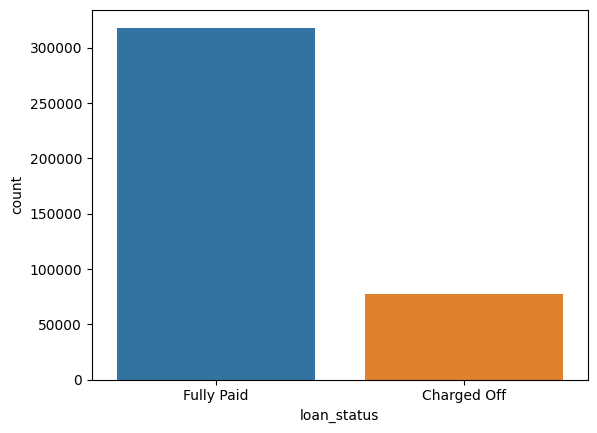

In [160]:
sns.countplot(data=df, x='loan_status', hue='loan_status')

It's evident that our dataset regarding loan status is unbalanced, with the number of fully paid loans being approximately three times greater than the number of charged off loans.

<Axes: xlabel='loan_amnt', ylabel='Count'>

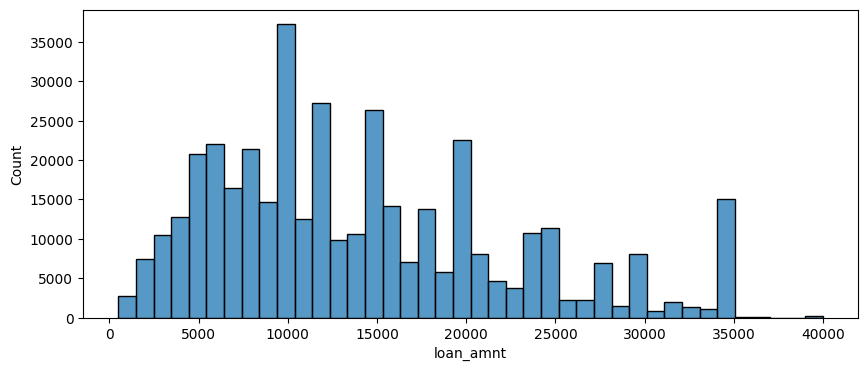

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='loan_amnt', bins=40)

The majority of loans appear to be in the range of 5,000 to 15,000 dollars.

In [13]:
numerical_df = df.select_dtypes(include=['number'])

<Axes: >

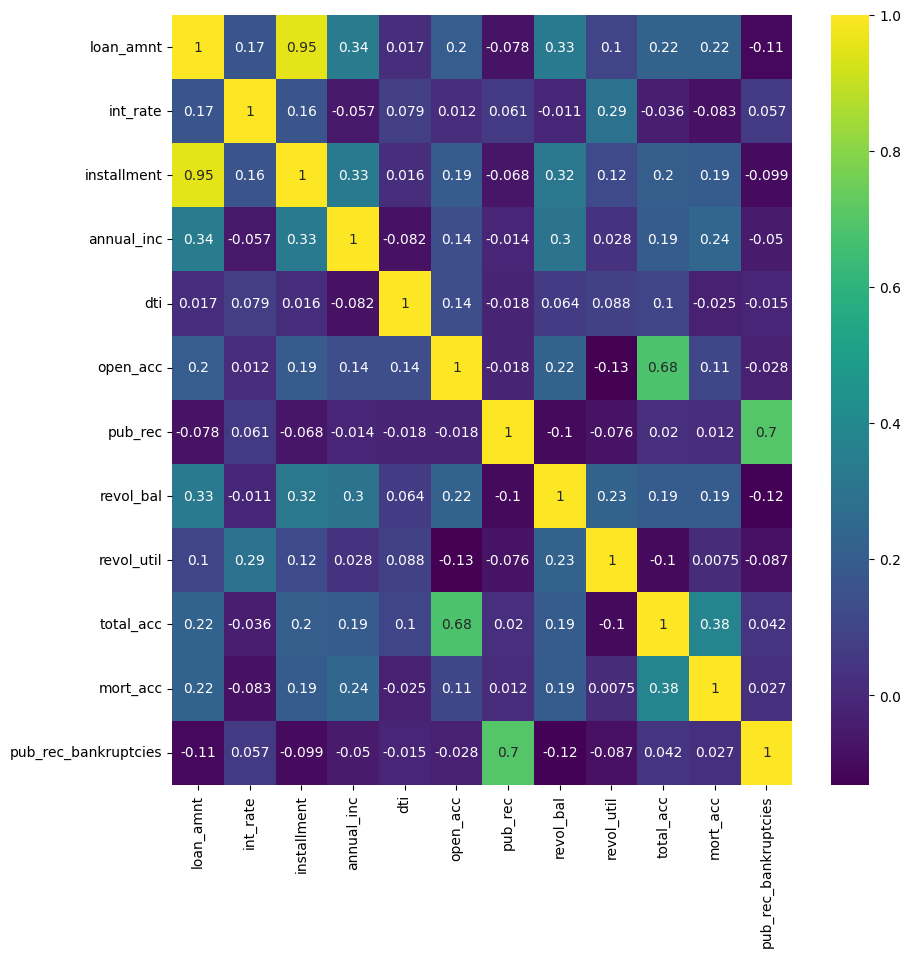

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')

<Axes: xlabel='installment', ylabel='loan_amnt'>

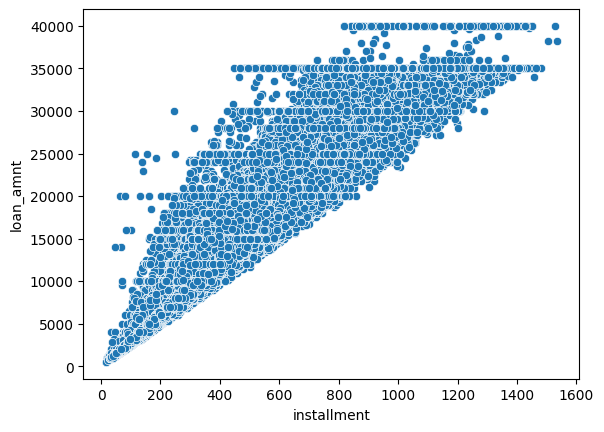

In [16]:
sns.scatterplot(data=df, x='installment', y='loan_amnt')

There seems to be a linear trend between the installment amounts and loan amounts, especially noticeable as loan amounts increase while the number of installments remains about fixed.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

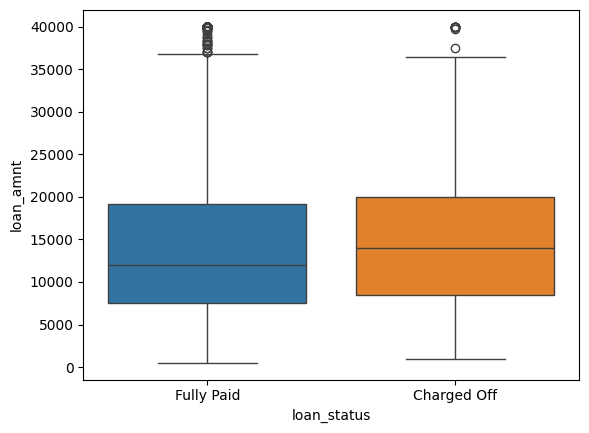

In [17]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt', hue='loan_status')

In [18]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


There appears to be little correlation between loan amount and status, suggesting that a customer's ability to repay the loan is not strongly tied to the borrowed amount.

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
' '.join(sorted(df['sub_grade'].unique()))

'A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'

<Axes: ylabel='count'>

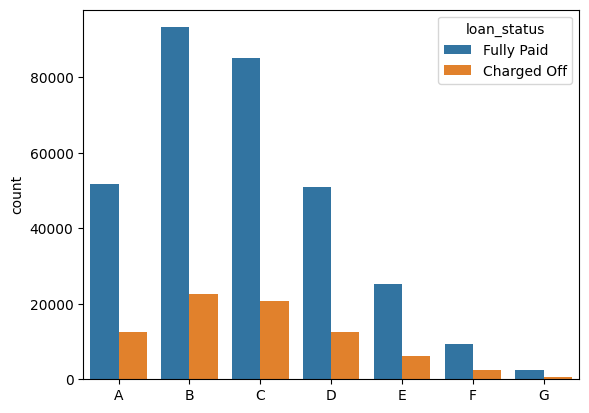

In [21]:
sns.countplot(data=df, x=sorted(df['grade']), hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

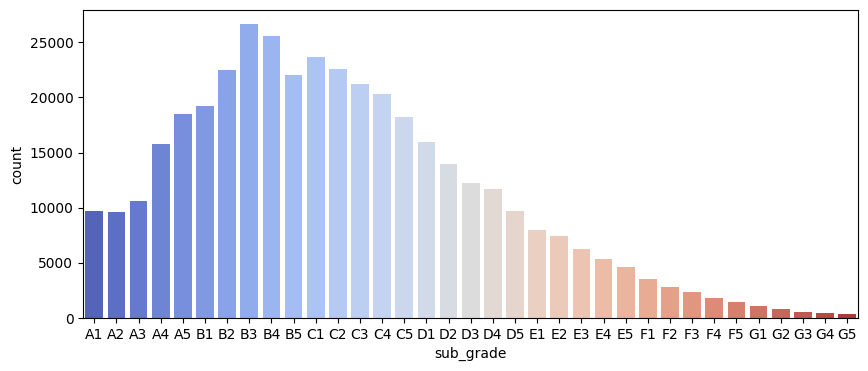

In [23]:
plt.figure(figsize=(10,4))
subgrade_order = sorted(df['sub_grade'].unique()) #just to sort the sub grades alphabetically
sns.countplot(data=df, x='sub_grade', hue='sub_grade', hue_order= subgrade_order, order = subgrade_order, palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

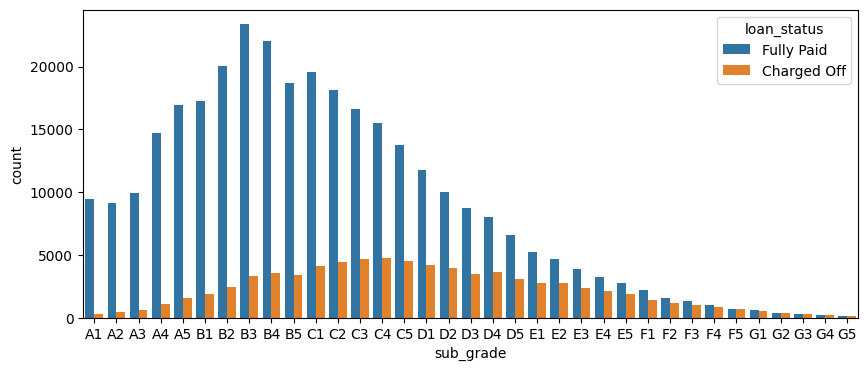

In [172]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='sub_grade', hue='loan_status', order = subgrade_order)

F and G subgrades don't get paid back that often as expected. We are going to dig deeper later on preprocessing.

<Axes: ylabel='count'>

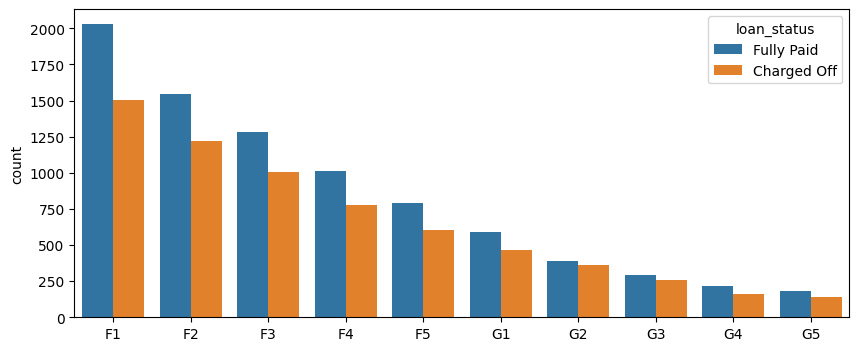

In [25]:
plt.figure(figsize=(10,4))
filtered = df[(df['grade'].isin(['F','G']))]
sns.countplot(data=filtered, x=sorted(filtered['sub_grade']), hue='loan_status')

Let's create a new column 'loan_repaid' which will be equal to 1 if the loan status was "Fully Paid" and 0 if it was "Charged Off".

In [26]:
def status(loan):
    if loan == 'Fully Paid':
        return 1
    else:
        return 0

df['loan_repaid'] = df['loan_status'].apply(status)

In [28]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


<Axes: >

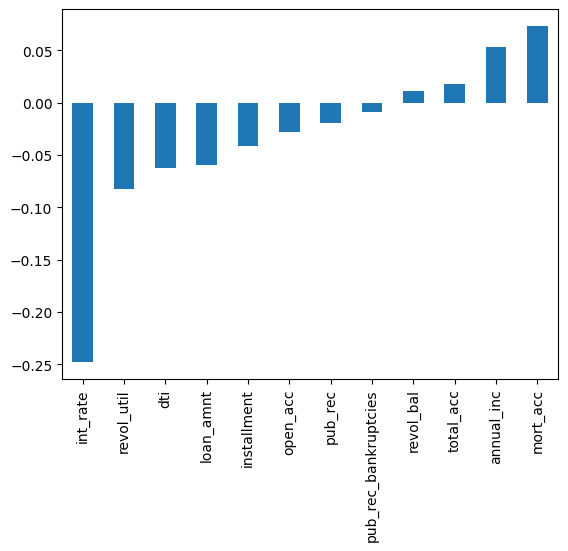

In [32]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

It's evident that the most correlated feature is the interest rate. However, the correlation is not directly proportional.
 
This suggests that higher interest rates tend to align with a higher likelihood of loan non-repayment (charged-off).

## Data PreProcessing

In [33]:
total_amount = df['loan_amnt'].count()
total_amount #length of dataset

396030

In [34]:
null_values = df.isnull().sum()
perc_null = null_values/total_amount * 100
null_df = pd.DataFrame({'is Null': null_values, 'Percentage' : perc_null})
null_df

,is Null,Percentage
loan_amnt,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,22927,5.789208
emp_length,18301,4.621115
home_ownership,0,0.000000
annual_inc,0,0.000000


Let's inspect each column with null values individually to determine the appropriate course of action.

In [35]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [37]:
df['emp_title'].nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature and possibly it won't give us any valuable insight. Let's remove that emp_title column and move on to the next column, employnment length.

In [38]:
df = df.drop('emp_title', axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

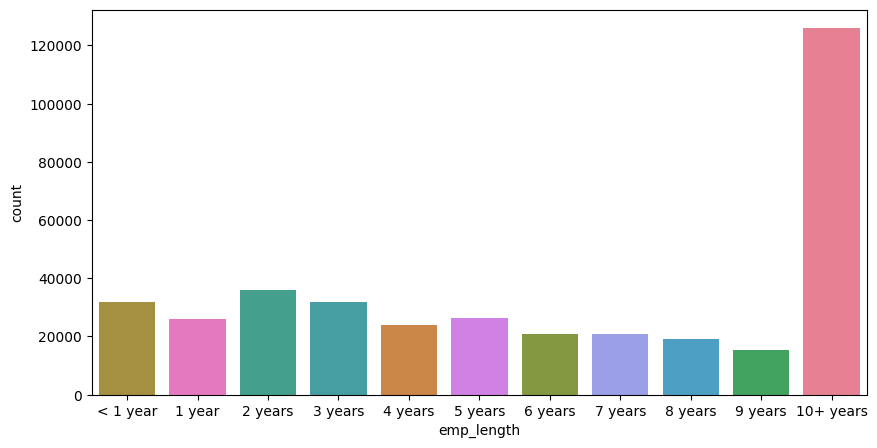

In [39]:
emp_length_order = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, hue='emp_length', legend=False)

<Axes: xlabel='emp_length', ylabel='count'>

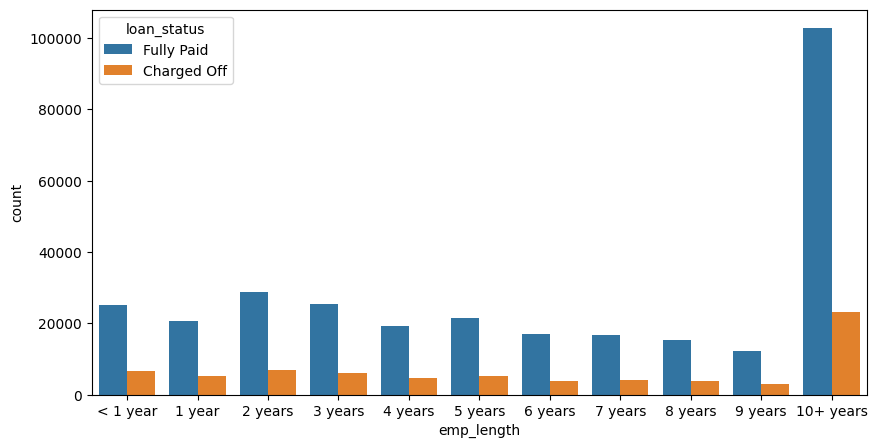

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category.

In [41]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [42]:
emp_perc = emp_co/emp_fp

In [43]:
pd.DataFrame(emp_perc)

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


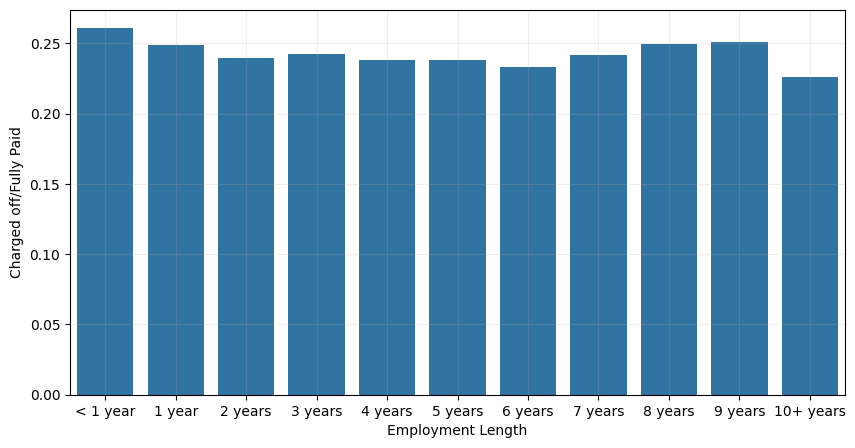

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=emp_perc, order=emp_length_order)
plt.ylabel('Charged off/Fully Paid')
plt.xlabel('Employment Length')
plt.grid(alpha=0.2)

Charge off rates are extremely similar across all employment lengths. Let's drop emp_length column too.

In [ ]:
df = df.drop('emp_length', axis=1)

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [50]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [51]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

The title column is simply a string description of the purpose column.

In [52]:
df = df.drop('title', axis=1)

In [53]:
feat_info('mort_acc')

Number of mortgage accounts.


In [54]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [55]:
print('Correlation with the mort_acc column:')
numerical_df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column:


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates well with the mort_acc. Let's try the fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [56]:
total_acc_mean = df.groupby('total_acc').mean('mort_acc')['mort_acc']
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

We fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc_mean value.

In [57]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [58]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [59]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

'revol_util' and 'pub_rec_bankruptcies' missing data points account for less than 0.5% of the total data. We will remove the rows that are missing those values.

In [60]:
df = df.dropna()

**Now that we're done working with the missing data, we need to deal with the string values due to the categorical columns.**

In [61]:
non_numeric_df = df.select_dtypes(['object']).columns
non_numeric_df

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We've split the 'term' column initially, but now we need to change its data type from 'object' to 'int'.

In [62]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [63]:
df['term'] = df['term'].astype(int)

'grade' is part of 'sub_grade' column so we can just drop this feature.

In [64]:
df = df.drop(['grade'], axis=1)

Let's convert the subgrade into dummy variables.

In [65]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [66]:
df = pd.concat([df, sub_grade_dummies], axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [68]:
df = df.drop(['sub_grade'], axis=1)

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
non_numeric_df = df.select_dtypes(['object']).columns
non_numeric_df

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

More dummy variables...

In [71]:
verif_dummie = pd.get_dummies(df['verification_status'], drop_first=True)
app_type_dummie = pd.get_dummies(df['application_type'], drop_first=True)
init_list_dummie = pd.get_dummies(df['initial_list_status'], drop_first=True)

In [72]:
purpose_dummie = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1), purpose_dummie], axis=1)

In [73]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status'], axis=1)
df = pd.concat([df, verif_dummie, app_type_dummie, init_list_dummie], axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w'],
      dtype='object')

In [77]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [78]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop(['home_ownership'], axis=1)
df = pd.concat([df, home_dummies], axis=1)

In [79]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [80]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [81]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'], axis=1)
df = pd.concat([df,zip_dummies],axis=1)

'issue_d' column would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model. In theory, we wouldn't have an issue_date

In [82]:
df = df.drop(['issue_d'], axis=1)

In [83]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [84]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda address: int(address[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [85]:
df = df.drop(['loan_status'], axis=1)

In [86]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Model Creation

We split our data to train and test sets.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

Next step is to normalize our data to enhance the performance of our model.

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

We'll only transform the X_test data to prevent any potential data leakage from fitting the test dataset.

Now it's time to create our Artificial Neural Network.

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [101]:
df.columns.shape[0]

79

In [102]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In creating this neural network model, we've tailored its architecture to suit our dataset and goal. With 78 input features, our model consists of three hidden layers with decreasing neuron counts (78, 39, and 19). 

We've added dropout regularization after each hidden layer to prevent overfitting and improve generalization. ReLU activation functions introduce non-linearity, helping the model learn complex patterns in the data. 

The output layer uses a sigmoid activation function for binary classification, predicting whether the loan will be repaid. We've chosen binary crossentropy loss and the Adam optimizer for efficient training

In [103]:
model.fit(x=X_train, 
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3511 - val_loss: 0.2647
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.2663 - val_loss: 0.2633
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 0.2625 - val_loss: 0.2629
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.2611 - val_loss: 0.2623
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 0.2609 - val_loss: 0.2617
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 0.2586 - val_loss: 0.2617
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 0.2606 - val_loss: 0.2615
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2603 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2587 - val_loss: 0.2614
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 0.2578 - val_loss: 0.2620
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.2588 - val_loss: 0.2616
Epoch 12/25
12

## Let's evaluate the performance of our model

In [104]:
losses = pd.DataFrame(model.history.history)

<Axes: >

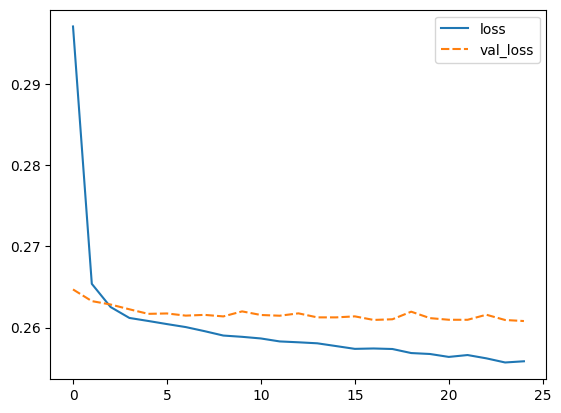

In [105]:
sns.lineplot(data=losses[['loss', 'val_loss']])

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
pred = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step


In [108]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 7094  8564]
 [  304 63082]]


The classification report indicates an accuracy of 89% for the model. It achieves high precision (96% for class 0 and 88% for class 1) and recall (100% for class 1 and 45% for class 0), with F1-scores of 0.62 for class 0 and 0.93 for class 1. 

The report suggests strong performance in predicting class 1 (repayment) but lower performance in predicting class 0 (non-repayment).

Let's examine the importance of the top three features of the first layer in our model.

In [136]:
input_layer_weights = model.layers[0].get_weights()[0]

feature_importance = np.abs(input_layer_weights).mean(axis=0)

sorted_indices = np.argsort(feature_importance)[::-1]

print("Top 3 most important features on the 1st layer are:")
for i, idx in enumerate(sorted_indices[:3]):
    column_name = df.columns[idx]
    print(f"Feature '{column_name}': Importance {feature_importance[idx]}")

Top 3 most important features on the 1st layer are:
Feature 'B5': Importance 0.3538549244403839
Feature '48052': Importance 0.3521984815597534
Feature 'E3': Importance 0.32952266931533813


The top three most important features for predicting loan repayment status, based on the feature importance analysis of the neural network model, are as follows:

* **Feature 'B5' (Loan Committee Assigned Loan Grade):**
This feature represents the loan grade assigned by the loan committee. It plays a significant role in determining the likelihood of loan repayment, with an importance value of 0.354. Loan grades typically reflect the creditworthiness of borrowers and are crucial factors in assessing the risk associated with lending.

* **Feature '48052' (Zip Code):**
This feature denotes the zip code associated with the borrower's location. It holds substantial importance in predicting loan repayment, with an importance value of 0.352. Zip codes can provide insights into socioeconomic factors, regional economic conditions, and borrower demographics, all of which influence repayment behavior.

* **Feature 'E3':**
Similar to 'B5', 'E3' represents another loan grade assigned by the loan committee. It is a key determinant of loan repayment likelihood, with an importance value of 0.330. Loan grades serve as indicators of credit risk and are pivotal in assessing the probability of repayment.
Overall, these top three features underscore the significance of borrower creditworthiness, geographic location, and loan grading in predicting loan repayment outcomes. Incorporating these features into lending decision-making processes can enhance risk assessment and improve loan portfolio performance.

*Based on the top three features, some strategies to improve loan prediction are:*

* ***Loan Grading Enhancement:***
*Refine loan grading criteria to incorporate additional borrower insights.*

* ***Geographic Risk Analysis:***
*Analyze regional risk factors to develop tailored risk mitigation strategies.*

* ***Feature Diversification:***
*Expand feature sets to include diverse borrower attributes.*

* ***Collaborative Risk Management:***
*Foster collaboration among stakeholders to share insights and enhance lending practices collectively.*


and for the second layer:

In [135]:
input_layer_weights = model.layers[2].get_weights()[0]

feature_importance = np.abs(input_layer_weights).mean(axis=0)

sorted_indices = np.argsort(feature_importance)[::-1]

print("Top 3 most important features on the 2nd layer are:")
for i, idx in enumerate(sorted_indices[:3]):
    column_name = df.columns[idx]
    print(f"Feature '{column_name}': Importance {feature_importance[idx]}")

Top 3 most important features on the 2nd layer are:
Feature 'dti': Importance 0.26535657048225403
Feature 'C2': Importance 0.25268760323524475
Feature 'revol_bal': Importance 0.2518133223056793


The second layer of the neural network model identifies the debt-to-income ratio (DTI) as the most crucial feature for predicting loan repayment. DTI represents the borrower's monthly debt payments (excluding mortgage and requested loan) divided by their self-reported monthly income, with an importance value of 0.265. This emphasizes the significance of assessing borrowers' financial health and capacity to manage additional debt obligations in loan prediction.

for the third layer:

In [139]:
input_layer_weights = model.layers[4].get_weights()[0]

feature_importance = np.abs(input_layer_weights).mean(axis=0)

sorted_indices = np.argsort(feature_importance)[::-1]

print("Top 3 most important features on the 2nd layer are:")
for i, idx in enumerate(sorted_indices[:3]):
    column_name = df.columns[idx]
    print(f"Feature '{column_name}': Importance {feature_importance[idx]}")

Top 3 most important features on the 2nd layer are:
Feature 'term': Importance 0.359903484582901
Feature 'int_rate': Importance 0.26835891604423523
Feature 'dti': Importance 0.26369449496269226


and for the final:

In [141]:
input_layer_weights = model.layers[6].get_weights()[0]

feature_importance = np.abs(input_layer_weights).mean(axis=0)

sorted_indices = np.argsort(feature_importance)[::-1]

print("Top most important feature is:")
for i, idx in enumerate(sorted_indices[:3]):
    column_name = df.columns[idx]
    print(f"Feature '{column_name}': Importance {feature_importance[idx]}")

Top most important feature is:
Feature 'loan_amnt': Importance 0.33117038011550903


The topmost important feature in the model, as expected, is the loan amount ('loan_amnt'), with an importance value of 0.331. This underscores the substantial impact of the requested loan amount on predicting loan repayment outcomes. 

The prominence of 'loan_amnt' highlights its significance as a key determinant of borrower risk and financial responsibility in the lending decision-making process.

*Based on the top features, we could imporve:*

* ***Risk Mitigation Policies:***
*Implement stricter loan approval criteria aligned with insights from key features like debt-to-income ratio (DTI) and loan amount ('loan_amnt') to minimize default risk and enhance portfolio stability.*

* ***Customer Segmentation:***
*Tailor loan products and services based on identified borrower characteristics, leveraging insights from the top features to offer personalized financial solutions and improve customer satisfaction.*

* ***Performance Monitoring:***
*Continuously monitor loan portfolio performance, focusing on metrics associated with top features, to proactively identify potential risks and optimize lending strategies for long-term profitability and risk management.*

## Let's try our model to one random person from the dataset:

In [120]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [121]:
pred2 = model.predict(new_customer.values.astype(np.float64).reshape(1,78))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [122]:
pred2

array([[1.]], dtype=float32)

In [123]:
df.iloc[random_ind]['loan_repaid']

1

The model accurately predicted that this specific customer will repay the loan!